# Global_Power_Plant_Database

Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Key Attributes:
    
    1. Country
    2. Country_long
    3. name
    4. gppd_idnr
    5. capacity_mw
    6. latitude
    7. longitude
    8. primary_fuel
    9. other_fuel1
    10. other_fuel2
    11. other_fuel3
    12. commissioning_year
    13. owner
    14. source
    15. url
    16. geolocation_source
    17. wepp_id
    18. year_of_capacity_data
    19. generation_gwh_2013
    20. generation_gwh_2014
    21. generation_gwh_2015
    22. generation_gwh_2016
    23. generation_gwh_2017
    24. generation_gwh_2018
    25. generation_gwh_2019
    26. generation_data_source
    27. estimated_genertaion_gwh

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
df.shape          

(907, 27)

AS other_fuel3 ,wepp_id ,generation_gwh_2013 ,generation_gwh_2019 ,estimated_generation_gwh  has all null values and other_fuel2 has only one value we can remove all these columns. And as owners also dont have any contibution in our data set we can drop it.  

In [7]:
df.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','other_fuel2','owner'],axis=1,inplace=True)


In [8]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [9]:
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

In [10]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [11]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())

In [12]:
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [13]:
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median())

In [14]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())
df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [15]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Now we have removed all null values from our dataset

In [16]:
collist = df.columns.values
for i in collist:
    print(f"unique value of{i} is \n {df[i].unique()}\n")

unique value ofcountry is 
 ['IND']

unique value ofcountry_long is 
 ['India']

unique value ofname is 
 ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'BADARPUR' 'BAGALKOT ICP

As country and country_long has only one value we can drop it.

we can drop name column 'name' and 'url' column as it does not contributes to our model prediction.

In [17]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [18]:
df.drop(['name','url'],axis=1,inplace=True)

In [19]:
cols = df.columns
num_cols = df._get_numeric_data().columns

categorical_data = list(set(cols)-set(num_cols))
categorical_data

['primary_fuel',
 'gppd_idnr',
 'generation_data_source',
 'geolocation_source',
 'other_fuel1',
 'source']

In [20]:
df['source'] = df['source'].astype(str)
df['other_fuel1'] = df['other_fuel1'].astype(str)
df['geolocation_source']=df['geolocation_source'].astype(str)
df['gppd_idnr'] = df['gppd_idnr'].astype(str)
df['generation_data_source'] = df['generation_data_source'].astype(str)
df['primary_fuel'] = df['primary_fuel'].astype(str)


In [21]:
from sklearn.preprocessing import LabelEncoder
cat_col = ['geolocation_source','gppd_idnr','generation_data_source','primary_fuel','source','other_fuel1']
le= LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])

In [22]:
df.shape

(907, 16)

In [23]:
df.describe()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,453.000000,326.223755,21.197918,77.464907,3.206174,1.995590,1997.091082,43.847850,1.733186,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
std,261.972645,590.085456,6.079148,4.812291,2.280652,0.081259,13.016360,44.642818,0.677151,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.0
min,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,226.500000,16.725000,17.072000,74.388900,1.000000,2.000000,1997.091082,22.000000,2.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340,0.0
50%,453.000000,59.200000,21.281800,76.979200,3.000000,2.000000,1997.091082,22.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
75%,679.500000,385.250000,25.176450,79.206100,6.000000,2.000000,2003.000000,29.500000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.0
max,906.000000,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,190.000000,2.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0


Key Observations:

There is large difference between 75% and max value in most of columns which means outliers are present. And we can see that skewness also present in many columns.

In [24]:
df.corr()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
gppd_idnr,1.000000,-0.335742,-0.105728,-0.377812,0.609180,0.002333,0.044059,4.163838e-01,-4.641741e-01,NaN,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,NaN
capacity_mw,-0.335742,1.000000,0.050984,0.195882,-0.380395,0.003105,0.274292,-2.421218e-01,2.048653e-01,NaN,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,NaN
latitude,-0.105728,0.050984,1.000000,0.036362,-0.010204,0.036695,0.102069,5.592656e-02,-1.842751e-01,NaN,4.432124e-02,3.639795e-02,3.125609e-02,3.121240e-02,3.132625e-02,NaN
longitude,-0.377812,0.195882,0.036362,1.000000,-0.347948,0.030311,0.092331,-2.393334e-01,2.523426e-01,NaN,1.147221e-02,1.881819e-02,3.920892e-02,3.967547e-02,3.777965e-02,NaN
primary_fuel,0.609180,-0.380395,-0.010204,-0.347948,1.000000,0.004912,-0.126650,5.361263e-02,-4.832168e-01,NaN,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,NaN
other_fuel1,0.002333,0.003105,0.036695,0.030311,0.004912,1.000000,0.036904,2.658990e-02,-2.140831e-02,NaN,2.450509e-02,2.679006e-02,3.157459e-02,2.111693e-02,3.567517e-02,NaN
commissioning_year,0.044059,0.274292,0.102069,0.092331,-0.126650,0.036904,1.000000,2.152776e-02,-7.843657e-03,NaN,1.330505e-01,1.473376e-01,1.706440e-01,1.708631e-01,1.743766e-01,NaN
source,0.416384,-0.242122,0.055927,-0.239333,0.053613,0.026590,0.021528,1.000000e+00,-5.057202e-01,NaN,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17,NaN
geolocation_source,-0.464174,0.204865,-0.184275,0.252343,-0.483217,-0.021408,-0.007844,-5.057202e-01,1.000000e+00,NaN,-2.966463e-17,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'year_of_capacity_data','generation_data_source' have no correlation with our target variable so can drop that column

In [25]:
df.drop(['year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

<AxesSubplot:>

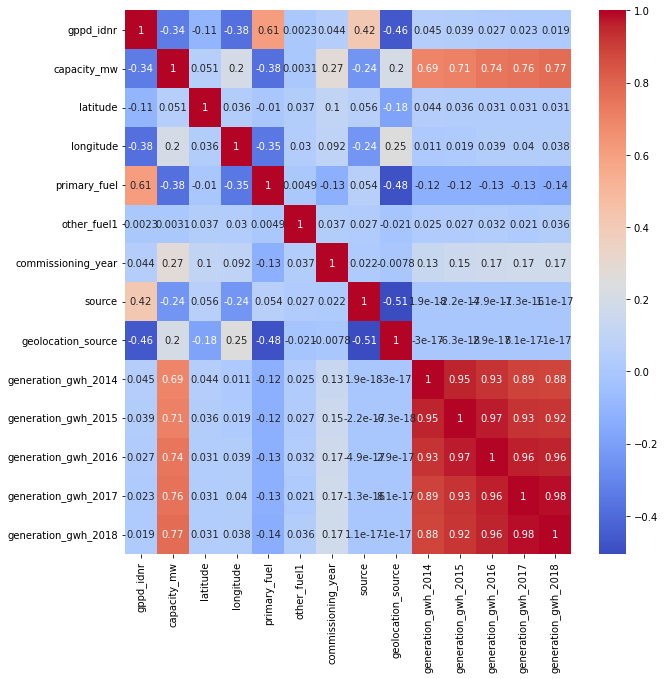

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Keeping 'capacity_mw' as target variable

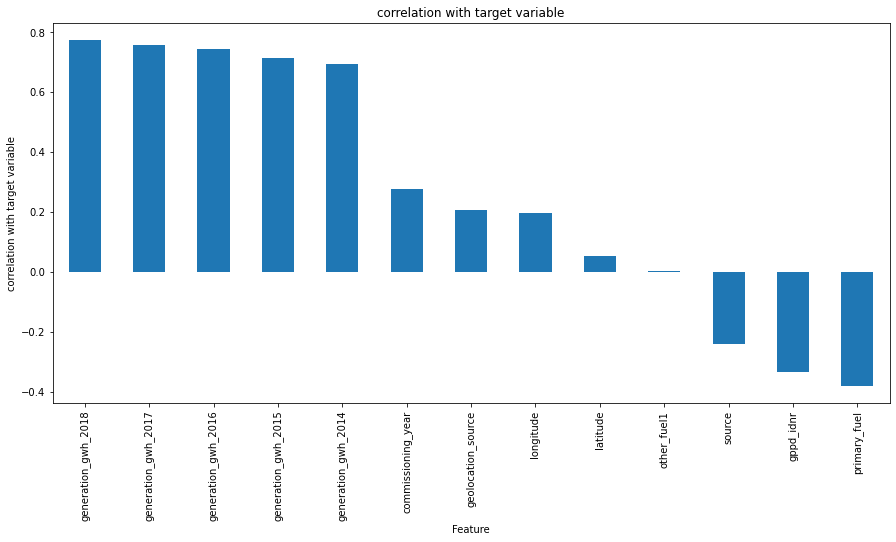

In [27]:
plt.figure(figsize=(15,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot.bar()
plt.xlabel("Feature")
plt.ylabel("correlation with target variable")
plt.title("correlation with target variable")
plt.show()

1. 'generation_gwh_2018','generation_gwh_2017','generation_gwh_2016' has postive correlation with target variable.
2. 'primary_fuel' has negative correlation with target variable

In [28]:
df.head(5)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,657,2.5,28.1839,73.2407,6,2,2011.000000,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,519,98.0,24.7663,74.6090,1,2,1997.091082,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,853,39.2,21.9038,69.3732,7,2,1997.091082,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,0,135.0,23.8712,91.3602,2,2,2004.000000,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1,1800.0,21.9603,82.4091,1,2,2015.000000,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [29]:
df.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [30]:
x = df.drop(['capacity_mw'],axis=1)
y = df['capacity_mw']

# Data Visualizations:

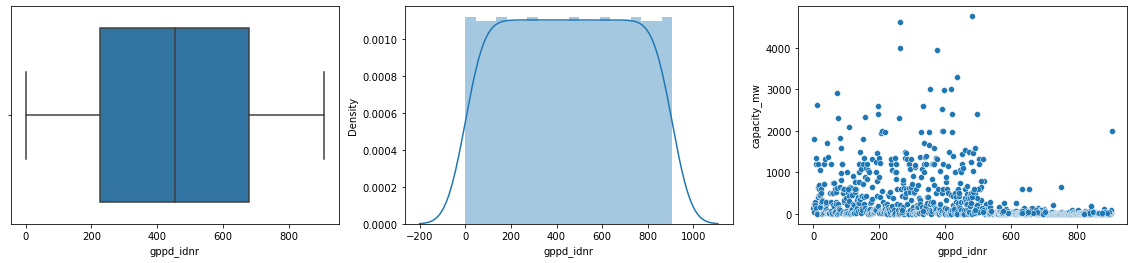

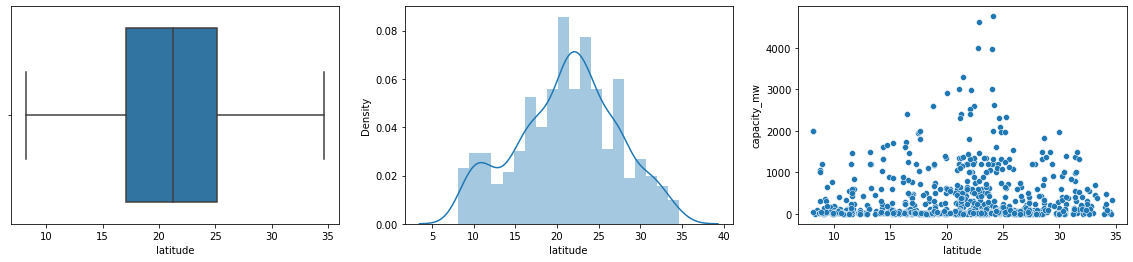

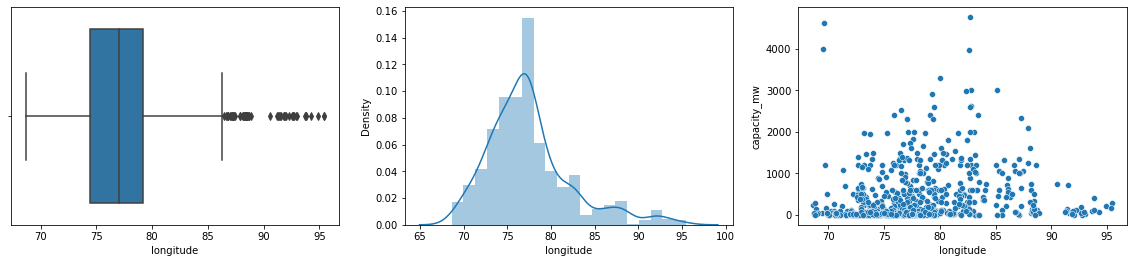

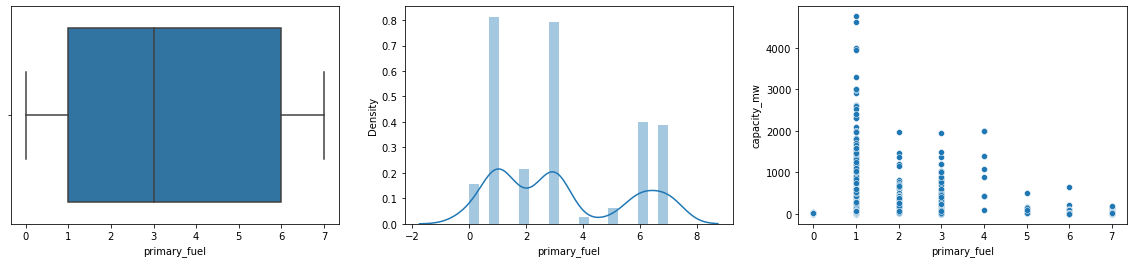

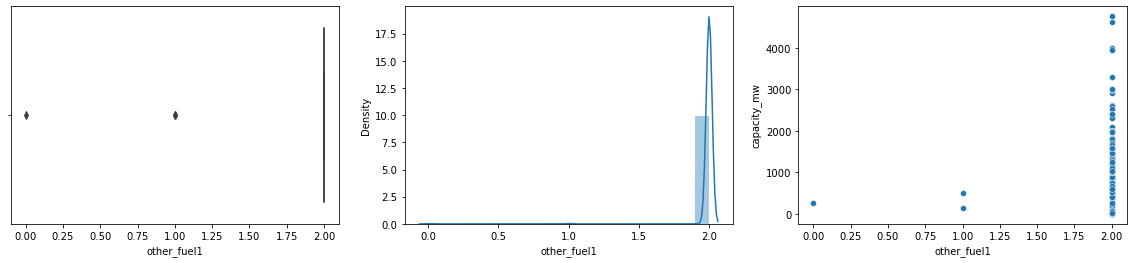

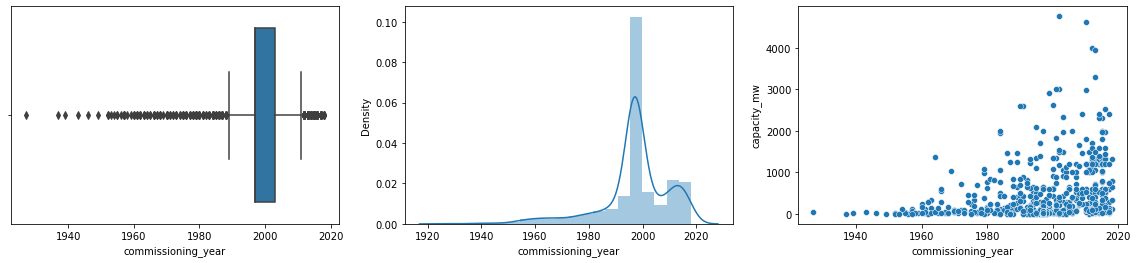

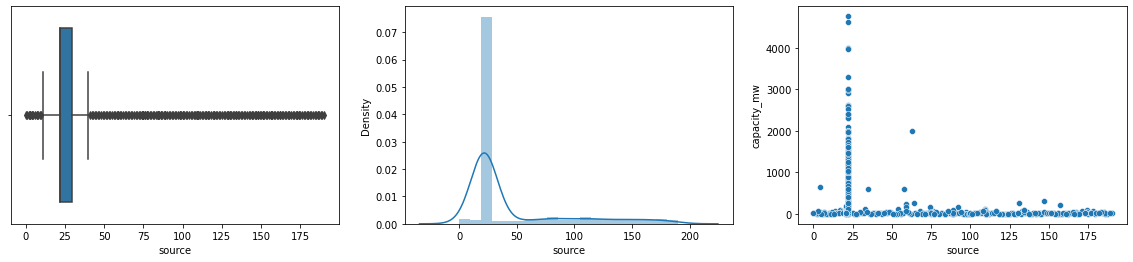

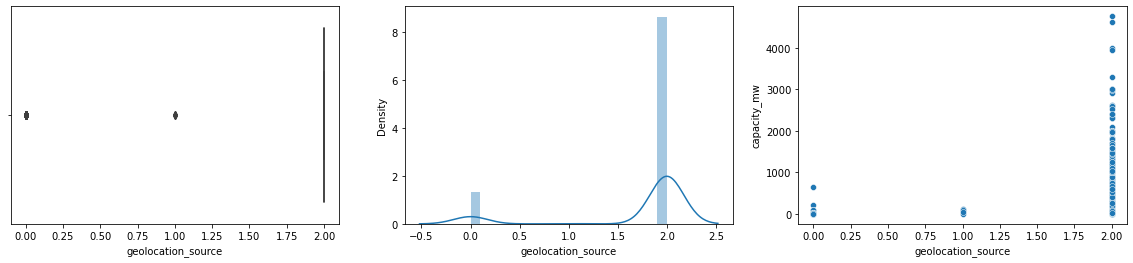

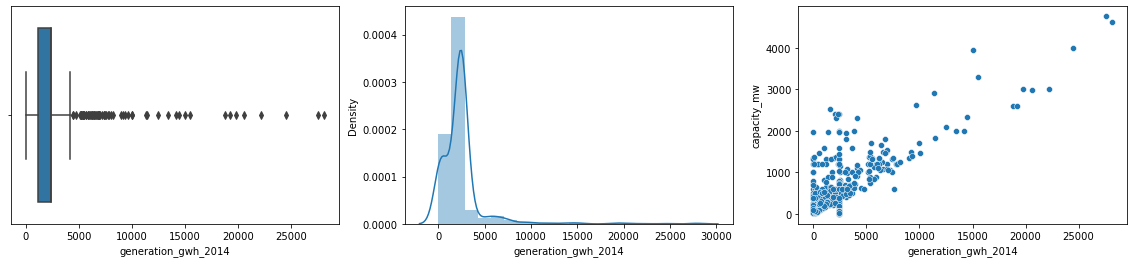

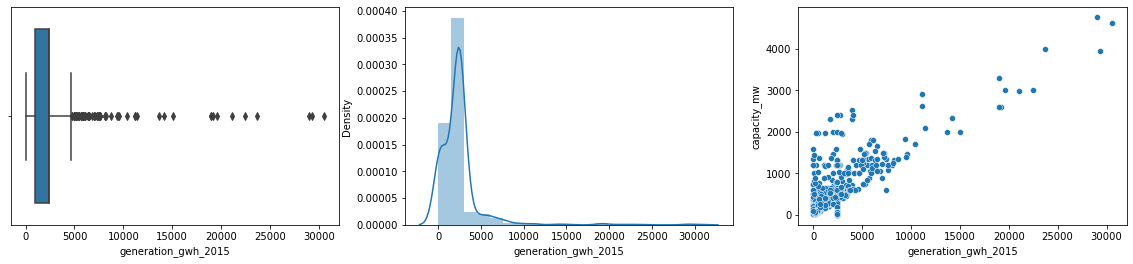

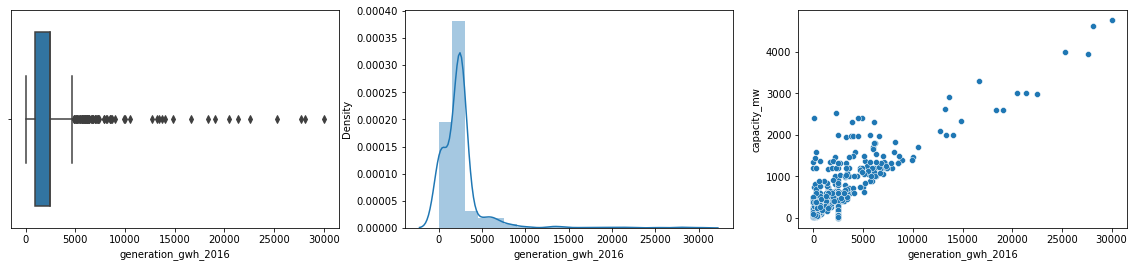

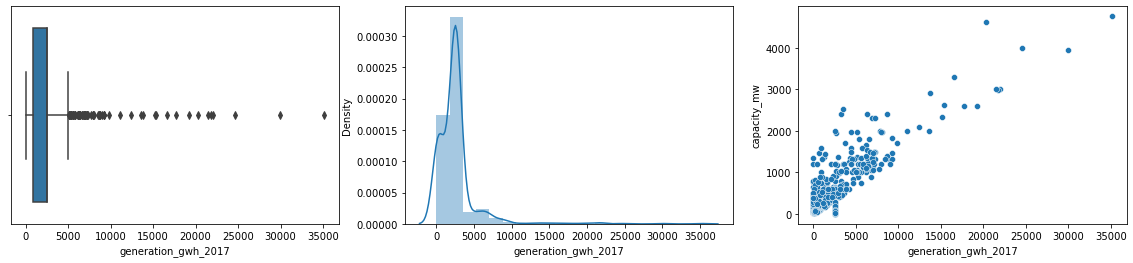

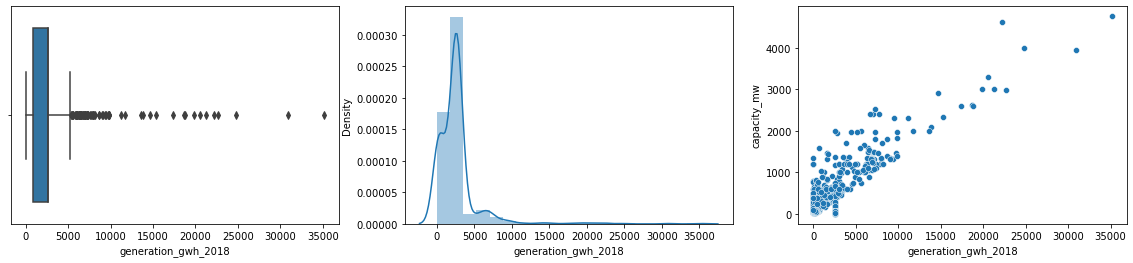

In [31]:
target_variable = 'capacity_mw'
feature_variable = ['gppd_idnr','latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']

def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a1 = sns.boxplot(x=df[feature_name],ax=axs[0])
    a2 = sns.distplot(df[feature_name],bins=20,kde=True,ax=axs[1])
    a3 = sns.scatterplot(data=df,x=feature_name,y=target_variable,ax=axs[2])
    plt.show()
    
for i in feature_variable:
    num_plots(i)

The above analysis shows the relationship between target and feature variable in different views

# skewness:

In [32]:
df.skew()

gppd_idnr               0.000000
capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.399359
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

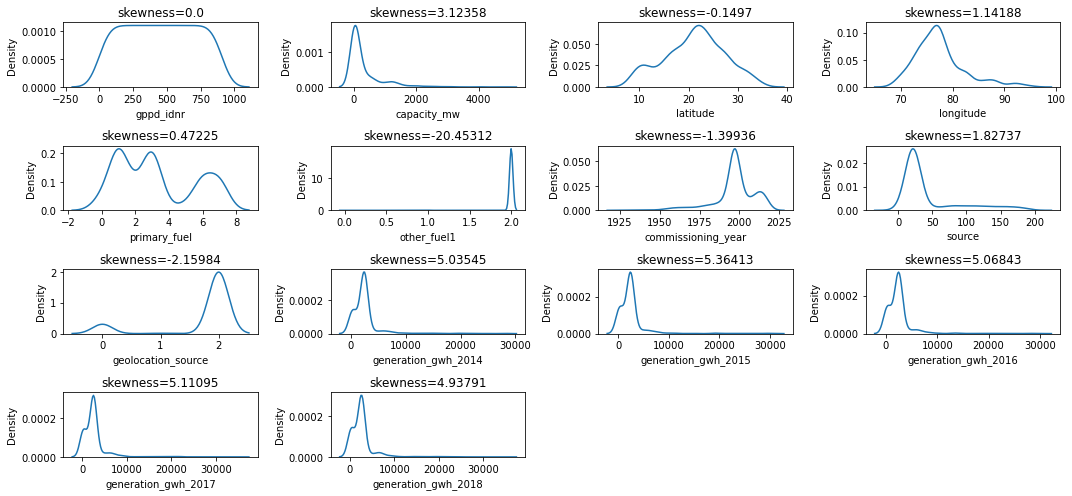

In [33]:
collist = df.columns.values
plt.figure(figsize=(15,7))

for i in range(0,len(collist)):
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness={round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

keeping +/-0.5 as skew value more columns are with skew. Lets remove skew using power transform method.

Removing skewness:

In [34]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')

In [35]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

8      0.123226
9      0.074582
10     0.041821
11     0.018337
2      0.002926
12     0.000783
3     -0.047067
1     -0.074269
5     -0.080999
6     -0.214066
0     -0.288179
7     -2.132728
4    -17.330022
dtype: float64

In [36]:
x = pd.DataFrame((x_new),columns=x.columns)

In [37]:
x.skew()

gppd_idnr              -0.288179
latitude               -0.074269
longitude               0.002926
primary_fuel           -0.047067
other_fuel1           -17.330022
commissioning_year     -0.080999
source                 -0.214066
geolocation_source     -2.132728
generation_gwh_2014     0.123226
generation_gwh_2015     0.074582
generation_gwh_2016     0.041821
generation_gwh_2017     0.018337
generation_gwh_2018     0.000783
dtype: float64

# Detecting Outliers:

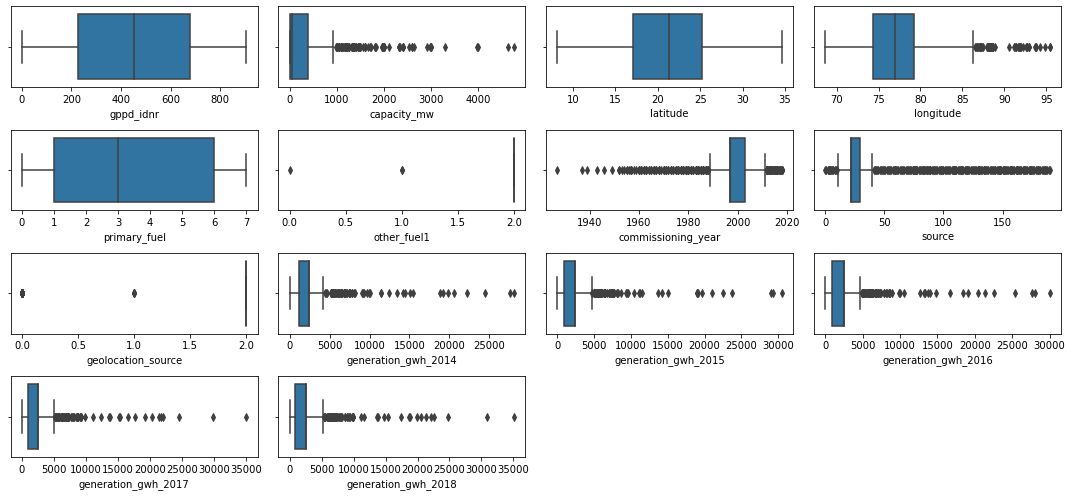

In [38]:
plt.figure(figsize=(15,7))
collist = df.columns.values
for i in range(0,len(collist)):
    plt.subplot(4,4,i+1)
    ax = sns.boxplot(df[collist[i]])
    plt.tight_layout()

Except 'gppd_idnr', 'latitude', 'primary_fuel' all other columns have outliers present

Removing Outliers:

In [39]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
X_new = x[(z>3).all(axis=1)]

In [40]:
print("Old DataFrame", x.shape)
print("New DataFrame", X_new.shape)
print("Rows Lost",x.shape[0]-X_new.shape[0])

Old DataFrame (907, 13)
New DataFrame (0, 13)
Rows Lost 907


Here all rows are lost so we need to perform further analysis without removing outliers

# Scaling Data

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Multicolinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature'] = x.columns
vif

,vif,feature
0,1.849517,gppd_idnr
1,1.123796,latitude
2,1.283871,longitude
3,1.880174,primary_fuel
4,1.045258,other_fuel1
5,1.110881,commissioning_year
6,1.455520,source
7,1.784982,geolocation_source
8,4.984400,generation_gwh_2014
9,8.985196,generation_gwh_2015


All columns have less values so we no need to remove any columns

# Training model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict

In [45]:
acc = 0

for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size=.22,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = r2_score(y_test,y_pred)
    if temp>acc:
        acc=temp
        best_rstate = i
 
print("Accuracy : ",acc*100,"RandomState : ",best_rstate)

Accuracy :  57.80324286869251 RandomState :  996


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.22,random_state=996)

In [47]:
x_train.shape

(707, 13)

In [48]:
x_test.shape

(200, 13)

In [49]:
y_train.shape

(707,)

In [50]:
y_test.shape

(200,)

In [51]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [52]:
li = LinearRegression()
la = Lasso()
ri = Ridge()
en = ElasticNet()
kn = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()

model = [li,la,ri,en,kn,dtr,rfr,ada]

In [53]:
score = []
mean_squared_err = []
mean_absolute_err = []
r2 = []

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    print("Accuracy Score of ",m," is : ",m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm = m.predict(x_test)
    
    print("Mean Squared Error is : ",mean_squared_error(y_test,predm))
    mean_squared_err.append(mean_squared_error(y_test,predm))
    print("Mean Absolute Error is : ",mean_absolute_error(y_test,predm))
    mean_absolute_err.append(mean_absolute_error(y_test,predm))
    print("R2 Score is : ",r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("\n")

Accuracy Score of  LinearRegression()  is :  0.5651854902287206
Mean Squared Error is :  119791.20457867738
Mean Absolute Error is :  242.04477536320576
R2 Score is :  0.6011455425608394


Accuracy Score of  Lasso()  is :  0.5650536021665328
Mean Squared Error is :  120060.06031609252
Mean Absolute Error is :  242.81399708775405
R2 Score is :  0.6002503657433653


Accuracy Score of  Ridge()  is :  0.565183730598297
Mean Squared Error is :  119760.71927627914
Mean Absolute Error is :  242.0878861647738
R2 Score is :  0.6012470458288854


Accuracy Score of  ElasticNet()  is :  0.5328409504471652
Mean Squared Error is :  127143.67190115894
Mean Absolute Error is :  251.3964525534792
R2 Score is :  0.5766649108227933


Accuracy Score of  KNeighborsRegressor()  is :  0.8702482144489821
Mean Squared Error is :  49302.679228861794
Mean Absolute Error is :  121.049501
R2 Score is :  0.8358427612170042


Accuracy Score of  DecisionTreeRegressor()  is :  1.0
Mean Squared Error is :  72773.749651

Here we have DecisionTreeRegressor with 100% accuracy followed by RandomForestRegressor with 97% accuracy. But we need to cross validate to conform this accuracy.

# Cross Validate

In [54]:
mean_score = []
std = []

for m in model:
    CV= cross_val_score(m,x,y,cv=5)
    print("Score of ",m," is ",CV)
    print("Mean Score is ",CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is ",CV.std())
    std.append(CV.std())
    print("\n")

Score of  LinearRegression()  is  [0.28365938 0.47354117 0.55424114 0.57043416 0.55155202]
Mean Score is  0.4866855736575835
Standard Deviation is  0.10693703432562811


Score of  Lasso()  is  [0.28973757 0.47756366 0.55304228 0.57274638 0.5509799 ]
Mean Score is  0.48881396088978485
Standard Deviation is  0.10468286341811027


Score of  Ridge()  is  [0.28567405 0.47419927 0.55404454 0.57114079 0.55145753]
Mean Score is  0.4873032362373859
Standard Deviation is  0.10623083585356569


Score of  ElasticNet()  is  [0.47926874 0.48939127 0.49610618 0.56312185 0.51853294]
Mean Score is  0.5092841960823454
Standard Deviation is  0.029847438745364215


Score of  KNeighborsRegressor()  is  [0.77603853 0.7446903  0.76395934 0.8323986  0.82342003]
Mean Score is  0.7881013595312126
Standard Deviation is  0.03412484018729832


Score of  DecisionTreeRegressor()  is  [0.72413719 0.63518689 0.73834529 0.79105036 0.81551177]
Mean Score is  0.7408463025540402
Standard Deviation is  0.0625215818497454



Here We Have RandomForestRegressor with 85% accuracy we can further hypertune to improvr accuracy.

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf,x_train,y_train,cv=5,n_jobs=-1).mean()

329.8121915700142

In [56]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [57]:
para_grid = [{"criterion":['mse','mae'],
             "n_estimators":[10,20,30,50,100],
             "max_features":["auto","sqrt","log2"],
             "min_samples_split":[2,4,8]}]

rf = RandomForestRegressor(random_state=42)

In [58]:
reg_grid = GridSearchCV(rf,para_grid,n_jobs=-1,cv=5)

In [59]:
reg_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [60]:
reg_grid.best_score_

0.8418640698191602

In [61]:
reg_grid.best_estimator_

RandomForestRegressor(criterion='mse', max_features='sqrt', random_state=42)

In [62]:
reg_final_model = reg_grid.best_estimator_
pred = cross_val_predict(reg_final_model,x_train,y_train,cv=5,n_jobs=-1)
pred.mean()

327.4720097595474

In [63]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_features='sqrt', random_state=42)

In [64]:
reg_final_model.score(x_train,y_train)

0.9796652979989288

After hypertuning we get 97.9% accuracy

# Saving the best model:

In [65]:
import joblib
joblib.dump(reg_final_model,"Global_Power_plant_Capacity_cw_prediction.obj")

['Global_Power_plant_Capacity_cw_prediction.obj']

# Keeping Primary fuel as target variable:

<AxesSubplot:>

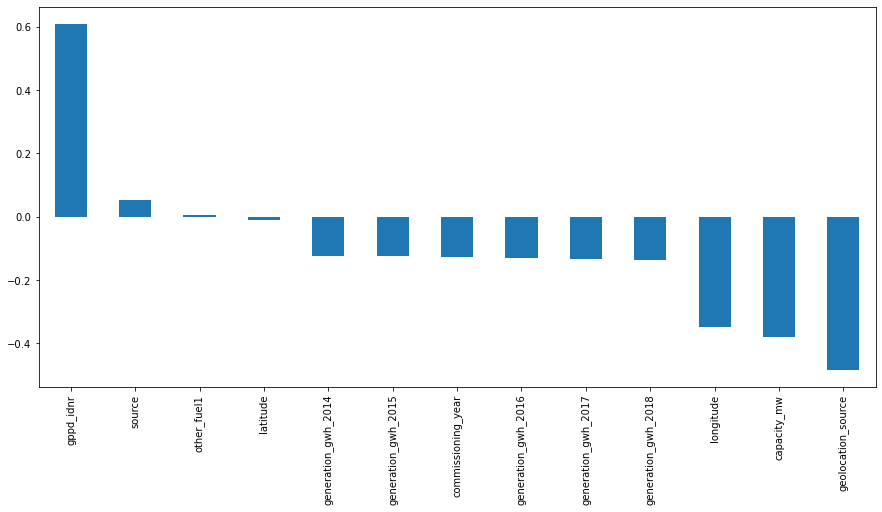

In [66]:
plt.figure(figsize=(15,7))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot.bar()

# key observations:

1. 'gppd_idnr' is positively corrletaed with target variable.
2. 'geolocation_source' is negatively correlated with the target variable

In [67]:
df.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [68]:
x1 = df.drop(['primary_fuel'],axis=1)
y1 = df['primary_fuel']

# Data Visulaization:

In [69]:
target_variable1 = 'primary_fuel'
feature_variable = ['gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']

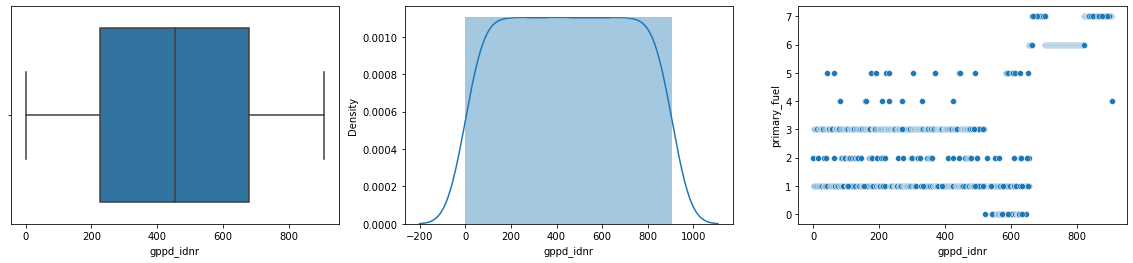

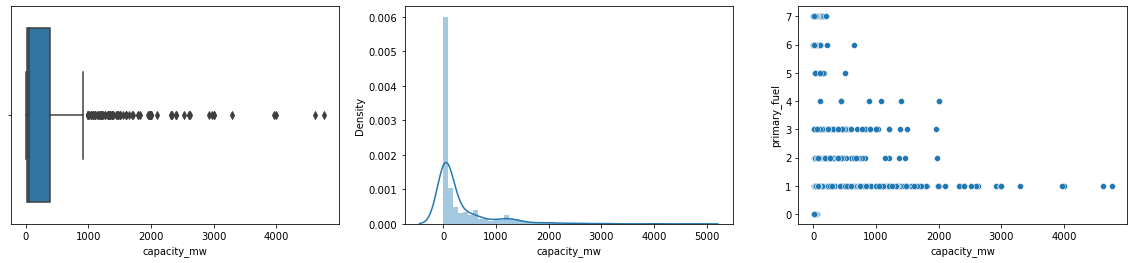

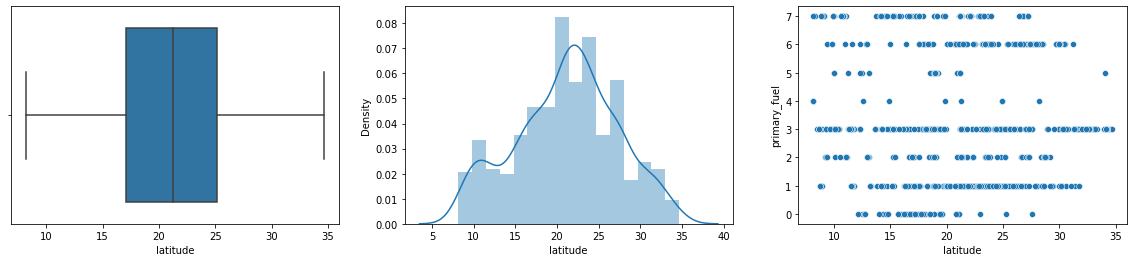

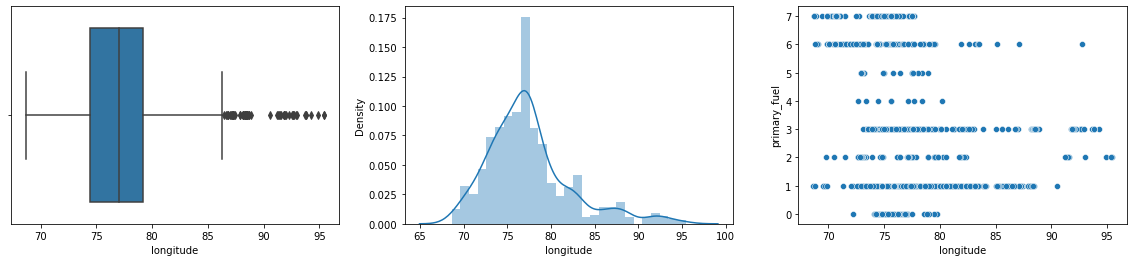

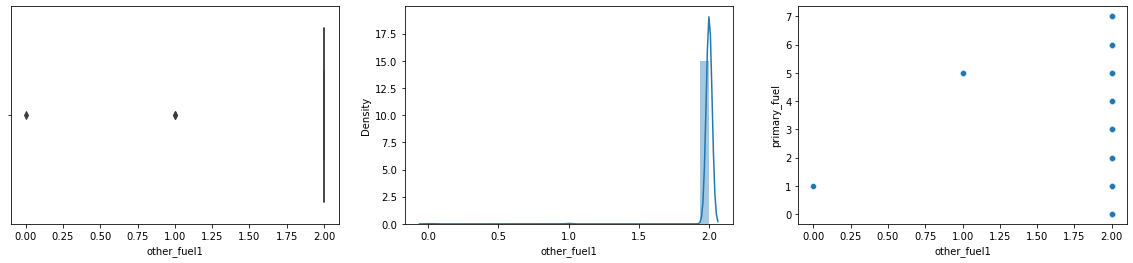

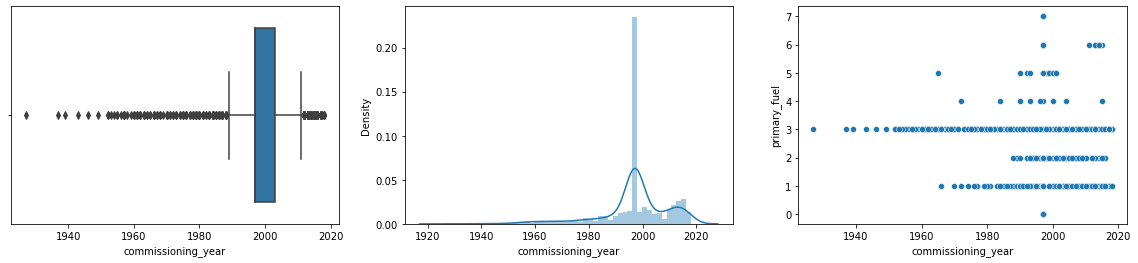

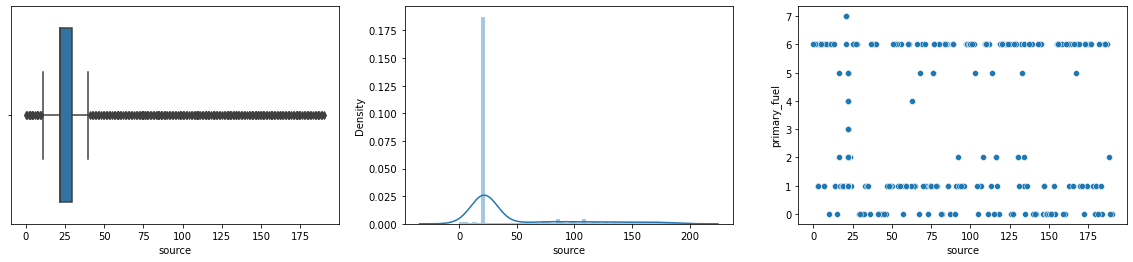

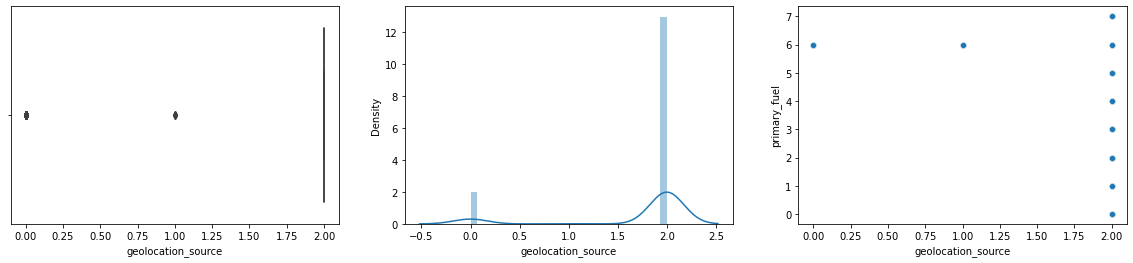

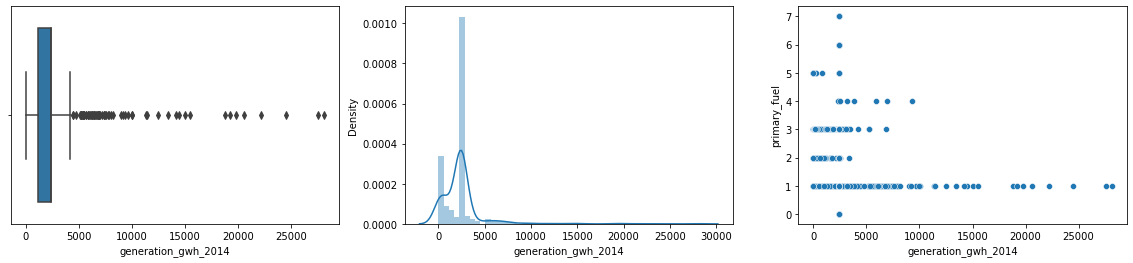

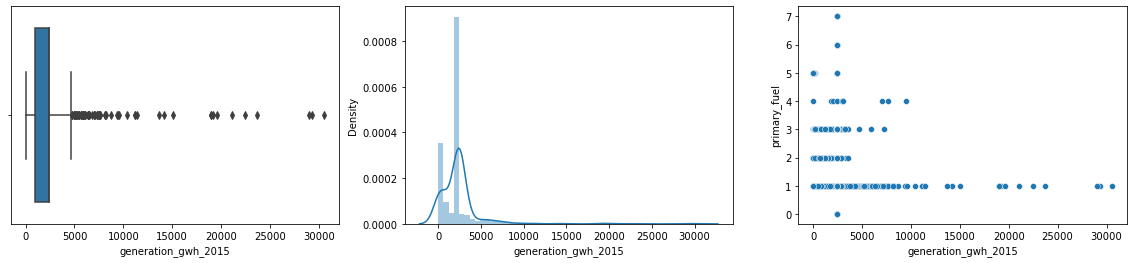

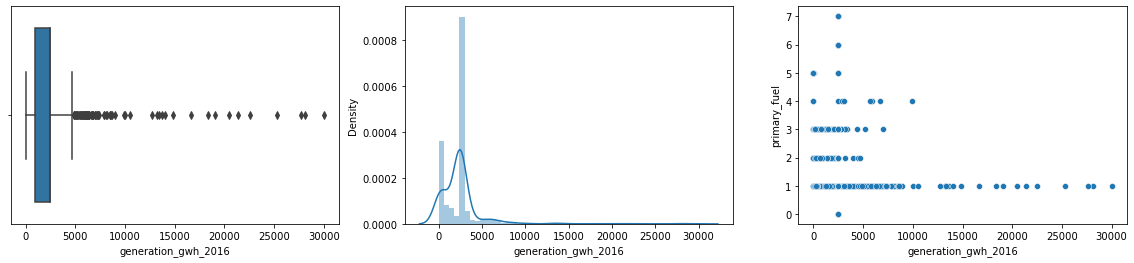

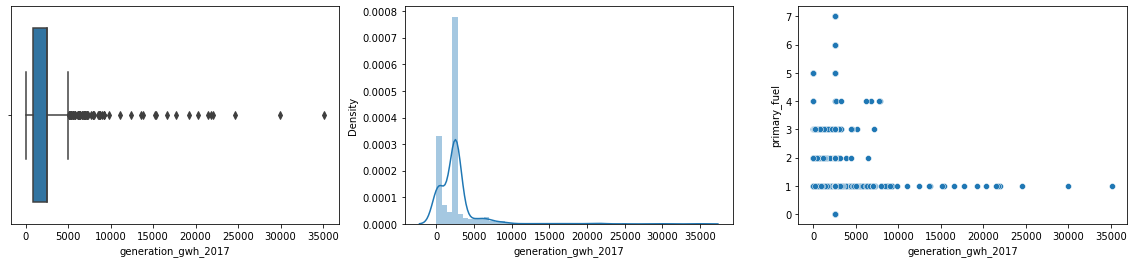

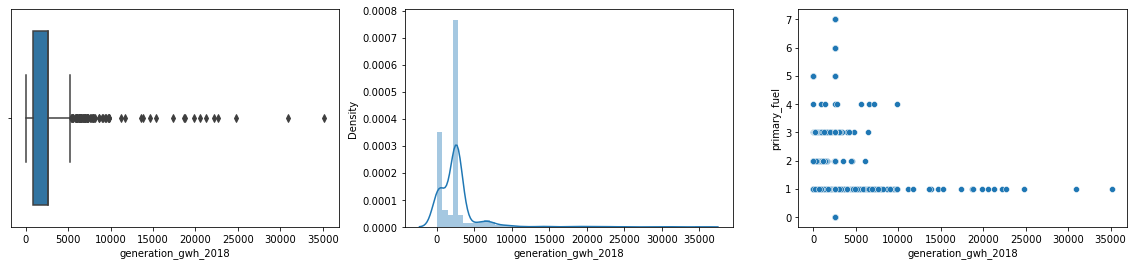

In [70]:
def num_plots(feature_name):
    fig,axs = plt.subplots(1,3,figsize=(20,4))
    a1 = sns.boxplot(x=df[feature_name],ax=axs[0])
    a2 = sns.distplot(df[feature_name],kde=True,ax=axs[1])
    a3 = sns.scatterplot(data=df,x=feature_name,y=target_variable1)
    plt.show()
for i in feature_variable:
    num_plots(i)

we can visualize the relationship between target and the feature variable from above analysis.

# Skewness:

In [71]:
df.skew()

gppd_idnr               0.000000
capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.399359
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

Removing skewness:

In [72]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x1,method='yeo-johnson')

In [73]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

8      0.123226
9      0.074582
10     0.041821
1      0.022164
11     0.018337
3      0.002926
12     0.000783
2     -0.074269
5     -0.080999
6     -0.214066
0     -0.288179
7     -2.132728
4    -17.330022
dtype: float64

In [74]:
x1 = pd.DataFrame((x_new),columns=x.columns)

# Detecting Outliers:

gppd_idnr                  AxesSubplot(0.125,0.71587;0.168478x0.16413)
latitude                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
longitude               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
primary_fuel            AxesSubplot(0.731522,0.71587;0.168478x0.16413)
other_fuel1               AxesSubplot(0.125,0.518913;0.168478x0.16413)
commissioning_year     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
source                 AxesSubplot(0.529348,0.518913;0.168478x0.16413)
geolocation_source     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
generation_gwh_2014       AxesSubplot(0.125,0.321957;0.168478x0.16413)
generation_gwh_2015    AxesSubplot(0.327174,0.321957;0.168478x0.16413)
generation_gwh_2016    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
generation_gwh_2017    AxesSubplot(0.731522,0.321957;0.168478x0.16413)
generation_gwh_2018          AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

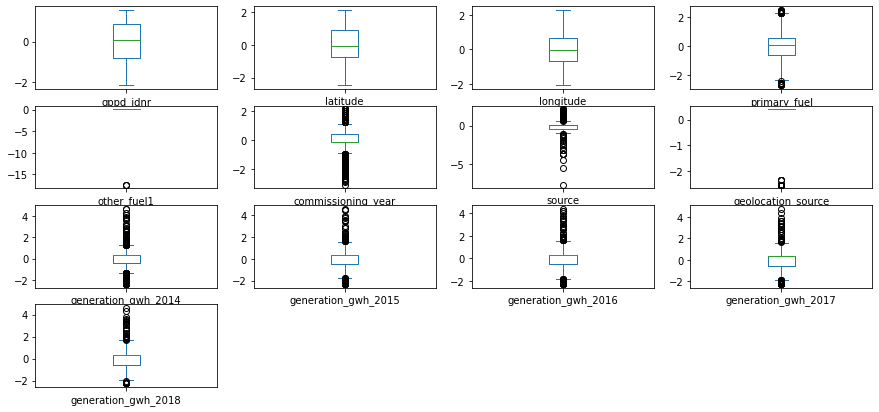

In [75]:
x1.plot(kind='box',subplots='True',layout=(4,4),figsize=(15,7))

Outliers are present in 'commissioning_year', 'source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018'

Removing outliers:

In [76]:
from scipy.stats import zscore
z = np.abs(zscore(x1))
threshold = 3
x1_new = x1[(z<3).all(axis=1)]

In [77]:
print("Old DataFrame : ",x1.shape)
print("New DataFrame : ", x1_new.shape)
print("Rows Dropped : ",x1.shape[0] - x1_new.shape[0])

Old DataFrame :  (907, 13)
New DataFrame :  (881, 13)
Rows Dropped :  26


In [78]:
percentage_loss = (907-887)/907*100
percentage_loss

2.2050716648291067

there is 2.2% data loss so we can drop the rows 

# Scaling the Data

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_scaled = sc.fit_transform(x1)

# MultiColinearity:

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x1_scaled,i) for i in range(x1_scaled.shape[1])]
vif['features'] = x1.columns
vif

,vif,features
0,1.949049,gppd_idnr
1,2.037658,latitude
2,1.123052,longitude
3,1.250667,primary_fuel
4,1.053014,other_fuel1
5,1.217512,commissioning_year
6,1.259093,source
7,1.611007,geolocation_source
8,5.008632,generation_gwh_2014
9,8.981491,generation_gwh_2015


as all values are low we no need to remove any rows

In [82]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

# Balancing dataset using SMOTE

In [83]:
import sklearn
sklearn.__version__

'1.0.2'

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smt = SMOTE()
train_x,train_y = smt.fit_resample(x1,y1)

In [86]:
train_y.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

# Training the data

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc = 0

for i in range(0,1000):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1_scaled,y1,random_state=i,test_size=.22)
    nb = GaussianNB()
    nb.fit(x1_test,y1_test)
    predy1 = nb.predict(x1_test)
    temp = accuracy_score(y1_test,predy1)
    if temp>acc:
        acc = temp
        best_rstate = i
print("Accuracy Score : ",acc*100,"random state : ",best_rstate)       

Accuracy Score :  77.5 random state :  359


In [88]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=359,test_size=.22)

In [89]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
gnb = GaussianNB()
svc = SVC()
kn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
ada = AdaBoostClassifier()

model = [gnb,svc,kn,dtc,rfc,ada]

In [91]:
for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm1 = m.predict(x1_test)
    print("Accuracy Score of ",m," is ",accuracy_score(y1_test,predm1))
    print("Mean Absolute Error is ",mean_absolute_error(y1_test,predm1))
    print("Mean Squared Error is ",mean_squared_error(y1_test,predm1))
    print("r2_score is ",r2_score(y1_test,predm1))
    
    print("Confusion Matrix : ",confusion_matrix(y1_test,predm1))
    print("Classification Report : ",classification_report(y1_test,predm1))
    print("\n\n")

Accuracy Score of  GaussianNB()  is  0.74
Mean Absolute Error is  0.46
Mean Squared Error is  0.97
r2_score is  0.8174495633845227
Confusion Matrix :  [[18  0  0  0  0  0  0  0]
 [ 7  3  0 19  5  0  0  0]
 [ 3  0  0 12  0  0  0  0]
 [ 0  0  0 68  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 1  0  0  4  0  1  0  0]
 [ 0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 34]]
Classification Report :                precision    recall  f1-score   support

           0       0.62      1.00      0.77        18
           1       1.00      0.09      0.16        34
           2       0.00      0.00      0.00        15
           3       0.65      1.00      0.79        68
           4       0.00      0.00      0.00         1
           5       1.00      0.17      0.29         6
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        34

    accuracy                           0.74       200
   macro avg       0.66      0.53      0.50       200
weighted av

here we have RandomForestClassifier with 85% accuracy

# Cross Validation:

In [92]:
mean_score = []
std = []

for m in model:
    CV = cross_val_score(m,x1,y1,cv=5)
    print("Score of ", m , " is ", CV)
    print("Mean Score is ", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation is : ",CV.std())
    std.append(CV.std())
    print("\n")

Score of  GaussianNB()  is  [0.61538462 0.60989011 0.60773481 0.60220994 0.68508287]
Mean Score is  0.6240604699168235
Standard Deviation is :  0.03080186993088736


Score of  SVC()  is  [0.78021978 0.82417582 0.8121547  0.80662983 0.83425414]
Mean Score is  0.8114868556857507
Standard Deviation is :  0.018335899207128244


Score of  KNeighborsClassifier()  is  [0.79120879 0.83516484 0.85082873 0.80110497 0.82872928]
Mean Score is  0.8214073219598081
Standard Deviation is :  0.022057362181272414


Score of  DecisionTreeClassifier()  is  [0.71978022 0.80769231 0.82872928 0.81767956 0.75690608]
Mean Score is  0.7861574889199199
Standard Deviation is :  0.041306981838502295


Score of  RandomForestClassifier()  is  [0.85164835 0.86813187 0.91712707 0.83425414 0.84530387]
Mean Score is  0.8632930605306296
Standard Deviation is :  0.02906538779711838


Score of  AdaBoostClassifier()  is  [0.3956044  0.64835165 0.50276243 0.65745856 0.56906077]
Mean Score is  0.554647562382369
Standard Devia

we have RandomForestClassifier with 85% accuracy.

# Hypertuning:

In [93]:
param_grid = [{"n_estimators":[20,100,150],
              "criterion":["gini","entropy"],
              "max_features":["auto","sqrt","log2"]}]

rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [94]:
rf_random = GridSearchCV(rf,param_grid,cv=5)

In [95]:
rf_random.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [20, 100, 150]}])

In [96]:
rf_random.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 150}

In [97]:
rf_random.best_score_

0.8600339626410948

In [99]:
preds = cross_val_predict(rf_random.best_estimator_,x1_train,y1_train,cv=5,n_jobs=-1)
preds

array([3, 3, 1, 2, 1, 3, 6, 6, 7, 7, 6, 7, 1, 1, 7, 7, 1, 2, 3, 6, 7, 3,
       0, 1, 3, 2, 1, 1, 3, 1, 3, 3, 3, 6, 7, 3, 1, 6, 3, 3, 3, 1, 3, 3,
       3, 1, 5, 1, 1, 1, 1, 6, 1, 1, 1, 7, 1, 3, 5, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 6, 1, 6, 0, 0, 3, 3, 7, 3, 3, 7, 3, 0, 1, 6, 0, 1,
       7, 3, 3, 1, 7, 3, 1, 7, 1, 3, 3, 1, 6, 1, 6, 1, 6, 3, 7, 1, 3, 7,
       2, 1, 6, 7, 6, 1, 7, 0, 1, 3, 1, 0, 0, 3, 3, 0, 1, 3, 7, 7, 3, 1,
       1, 1, 6, 1, 2, 2, 1, 3, 2, 5, 1, 7, 1, 1, 3, 7, 6, 1, 3, 1, 7, 1,
       7, 3, 3, 6, 1, 1, 2, 1, 7, 3, 2, 7, 3, 3, 6, 1, 1, 3, 1, 3, 3, 2,
       1, 3, 1, 1, 3, 3, 3, 6, 6, 6, 6, 3, 1, 1, 6, 3, 6, 6, 7, 1, 3, 1,
       3, 3, 3, 1, 7, 1, 6, 6, 7, 1, 1, 1, 7, 3, 1, 3, 6, 3, 6, 6, 3, 1,
       1, 1, 3, 6, 1, 1, 5, 1, 6, 1, 1, 1, 1, 1, 6, 1, 6, 3, 6, 1, 3, 1,
       7, 3, 1, 1, 3, 7, 3, 1, 1, 3, 7, 1, 1, 1, 7, 3, 7, 0, 7, 1, 3, 3,
       3, 7, 3, 2, 0, 1, 7, 6, 1, 1, 5, 0, 7, 3, 1, 1, 1, 3, 1, 6, 2, 3,
       6, 3, 3, 1, 6, 3, 6, 6, 1, 1, 6, 7, 6, 6, 0,

In [100]:
classifier_final_model = rf_random.best_estimator_
y1_pred = classifier_final_model.predict(x1_test)

# AUC-ROC Curve

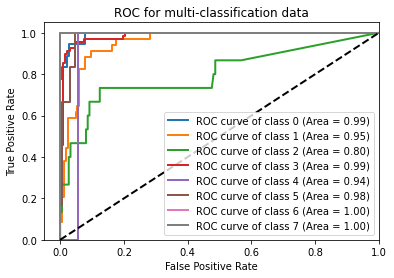

In [125]:
# Plotting ROC curve for all the models
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

classifier = OneVsRestClassifier(classifier_final_model)
y_sco = classifier.fit(x1_train, y1_train).predict_proba(x1_test)

y_test_bin  = label_binarize(y1_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

false_pr = dict()
true_pr = dict()
roc_auc = dict()
for i in range(n_classes):
    false_pr[i], true_pr[i], _ = roc_curve(y_test_bin[:, i], y_sco[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])
   
for i in range(n_classes):
    plt.plot(false_pr[i], true_pr[i], lw=2,
             label='ROC curve of class {0} (Area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-classification data')
plt.legend(loc="lower right")
plt.show()

we have RandomForestClassifier with 99% accuracy

# Saving the best model

In [126]:
import joblib
joblib.dump(classifier_final_model,"Global_Power_Plant_Primary_Fuel_Prediction.obj")

['Global_Power_Plant_Primary_Fuel_Prediction.obj']